In [ ]:
import pandas as pd
import os
pd.set_option('max_columns', None)#afisare toate coloanele

In [ ]:
files = [ file for file in os.listdir("/content/")]
files = files[1:-1]
print (files)

all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv(f"/content/{file}")
  all_months_data = pd.concat([all_months_data, df])

all_months_data.head()

['Sales_May_2019.csv', 'Sales_April_2019.csv', 'Sales_July_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'Sales_August_2019.csv', 'Sales_September_2019.csv', 'Sales_March_2019.csv', 'All_months_data.csv', 'Sales_February_2019.csv', 'Sales_November_2019.csv', 'Sales_December_2019.csv', 'Sales_June_2019.csv']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [ ]:
all_months_data.to_csv("All_months_data.csv", index=False)

In [ ]:
#work on copy of dataframe
df = all_months_data.copy()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


#What is the best month for sales? How much was earned that month?

In [ ]:
#identify NaN rows
nan_df = df[df.isna().any (axis=1)]
nan_df.head()

df = df.dropna(how="any")

In [ ]:
#add month column
df["Month"] = df["Order Date"].str[0:2]
temp_df = df[df["Month"]== "Or"]
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [ ]:
df = df[df["Month"] != "Or"]

In [ ]:
df["Month"] = df["Month"].astype("int32")
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6
13621,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301",6


In [ ]:
#add sales inmcome for each row
df["Sales"] = df["Quantity Ordered"].astype("float64") * df["Price Each"].astype("float64")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98


In [ ]:
result = df.groupby("Month").sum()#sum each column field to the specific 
type(result)
max=0
indice_max = 0
for index, row in result.iterrows():
  if max < row["Sales"]:
    max = row["Sales"]
    indice_max = index

print(indice_max)
print(result)

12
            Sales
Month            
1      1822256.73
2      2202022.42
3      2807100.38
4      3390670.24
5      3152606.75
6      2577802.26
7      2647775.76
8      2244467.88
9      2097560.13
10     3736726.88
11     3199603.20
12     4613443.34


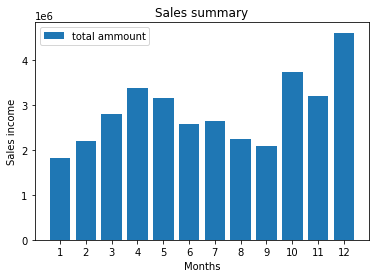

In [ ]:
#vizualize data
import matplotlib.pyplot as plt
month = [ i for i in range(1,13)]
y = [i for i in range(0,50000000, 10000000)]

plt.bar(month, result["Sales"], label="total ammount")
plt.xticks(month)
plt.xlabel("Months")
plt.ylabel("Sales income")
plt.title("Sales summary")
plt.legend()
plt.show()


#what city had the highest number of sales

In [ ]:
df2 = df.copy()
print(df2.head())

  Order ID                 Product Quantity Ordered Price Each  \
0   194095        Wired Headphones                1      11.99   
1   194096   AA Batteries (4-pack)                1       3.84   
2   194097        27in FHD Monitor                1     149.99   
3   194098        Wired Headphones                1      11.99   
4   194099  AAA Batteries (4-pack)                2       2.99   

       Order Date                         Purchase Address  Month   Sales  
0  05/16/19 17:14      669 2nd St, New York City, NY 10001      5   11.99  
1  05/19/19 14:43          844 Walnut St, Dallas, TX 75001      5    3.84  
2  05/24/19 11:36  164 Madison St, New York City, NY 10001      5  149.99  
3  05/02/19 20:40          622 Meadow St, Dallas, TX 75001      5   11.99  
4  05/11/19 22:55          17 Church St, Seattle, WA 98101      5    5.98  


In [ ]:
a= "669 2nd St, New York City, NY 10001"
b = a.split(",")[1]
b

' New York City'

In [ ]:
def get_state(address):
  return address.split(",")[2].split(" ")[1]
def get_city(address):
  return address.split(",")[1]

In [ ]:
#add a city column
df2["City"] = df2["Purchase Address"].apply(lambda x : f"{get_city(x)} ({get_state(x)})")#apply a specific function
print(df2.head())
print(df2["City"].unique())#verify mismatches


  Order ID                 Product Quantity Ordered Price Each  \
0   194095        Wired Headphones                1      11.99   
1   194096   AA Batteries (4-pack)                1       3.84   
2   194097        27in FHD Monitor                1     149.99   
3   194098        Wired Headphones                1      11.99   
4   194099  AAA Batteries (4-pack)                2       2.99   

       Order Date                         Purchase Address  Month   Sales  \
0  05/16/19 17:14      669 2nd St, New York City, NY 10001      5   11.99   
1  05/19/19 14:43          844 Walnut St, Dallas, TX 75001      5    3.84   
2  05/24/19 11:36  164 Madison St, New York City, NY 10001      5  149.99   
3  05/02/19 20:40          622 Meadow St, Dallas, TX 75001      5   11.99   
4  05/11/19 22:55          17 Church St, Seattle, WA 98101      5    5.98   

                  City  
0   New York City (NY)  
1          Dallas (TX)  
2   New York City (NY)  
3          Dallas (TX)  
4         Seatt

In [ ]:
result = df2.groupby("City").sum()
result.sort_values("Sales", ascending=False)
print(result)
print(f"\n{result.columns}")


                      Month       Sales
City                                   
 Atlanta (GA)        104794  2795498.58
 Austin (TX)          69829  1819581.75
 Boston (MA)         141112  3661642.01
 Dallas (TX)         104620  2767975.40
 Los Angeles (CA)    208325  5452570.80
 New York City (NY)  175741  4664317.43
 Portland (ME)        17144   449758.27
 Portland (OR)        70621  1870732.34
 San Francisco (CA)  315520  8262203.91
 Seattle (WA)        104941  2747755.48

Index(['Month', 'Sales'], dtype='object')


# when should we display advertisements to maximaze buying products?

In [ ]:
#make a copy
df3 = df.copy()

In [ ]:
df3["Order Date"] = pd.to_datetime(df3["Order Date"])
print(df3.head())

  Order ID                 Product Quantity Ordered Price Each  \
0   194095        Wired Headphones                1      11.99   
1   194096   AA Batteries (4-pack)                1       3.84   
2   194097        27in FHD Monitor                1     149.99   
3   194098        Wired Headphones                1      11.99   
4   194099  AAA Batteries (4-pack)                2       2.99   

           Order Date                         Purchase Address  Month   Sales  
0 2019-05-16 17:14:00      669 2nd St, New York City, NY 10001      5   11.99  
1 2019-05-19 14:43:00          844 Walnut St, Dallas, TX 75001      5    3.84  
2 2019-05-24 11:36:00  164 Madison St, New York City, NY 10001      5  149.99  
3 2019-05-02 20:40:00          622 Meadow St, Dallas, TX 75001      5   11.99  
4 2019-05-11 22:55:00          17 Church St, Seattle, WA 98101      5    5.98  


In [ ]:
df3["Hour"] = df3["Order Date"].apply(lambda x : str(x))
df3["Hour"] = df3["Hour"].apply(lambda x : int(x[-8:-6]))
df3.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,19
13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,19
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,18
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,18
13621,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,14


In [ ]:
df3["Minute"] = df3["Order Date"].apply(lambda x : str(x))
df3["Minute"] = df3["Minute"].apply(lambda x : int(x[-5:-3]))
df3.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,Minute
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,19,2
13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,19,29
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,18,57
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,18,35
13621,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,14,33


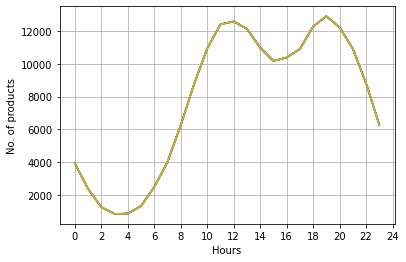

In [ ]:
hours = [ hour for hour, df in df3.groupby("Hour")] #take the 1:1 corespondent for each group by
plt.plot(hours, df3.groupby("Hour").count())
plt.xticks([x for x in range(0,25,2)])
plt.xlabel("Hours")
plt.ylabel("No. of products")
plt.grid()
plt.show()
# around 11 am and 7 pm are best moments to display ads

In [ ]:
#dysplay hours on New York
df4 = df3.copy()
df4["City"] = df4['Purchase Address'].apply(lambda x : str(x))
df4["City"] = df4["City"].apply(lambda x : x.split(",")[1])
print(df4.tail())



      Order ID                 Product Quantity Ordered Price Each  \
13617   222905  AAA Batteries (4-pack)                1       2.99   
13618   222906        27in FHD Monitor                1     149.99   
13619   222907    USB-C Charging Cable                1      11.95   
13620   222908    USB-C Charging Cable                1      11.95   
13621   222909  AAA Batteries (4-pack)                1       2.99   

               Order Date                       Purchase Address  Month  \
13617 2019-06-07 19:02:00          795 Pine St, Boston, MA 02215      6   
13618 2019-06-01 19:29:00  495 North St, New York City, NY 10001      6   
13619 2019-06-22 18:57:00  319 Ridge St, San Francisco, CA 94016      6   
13620 2019-06-26 18:35:00   916 Main St, San Francisco, CA 94016      6   
13621 2019-06-25 14:33:00         209 11th St, Atlanta, GA 30301      6   

        Sales  Hour  Minute            City  
13617    2.99    19       2          Boston  
13618  149.99    19      29   New Yo

KeyError: ignored

In [ ]:
#df4 = df4.reset_index()
df_NY = df4.loc[df4["City"] == " New York City"]
result = df_NY.groupby(["Hour"]).count()
df_NY.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,Minute,City
0,0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,17,14,New York City
2,2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,11,36,New York City
12,12,194107,34in Ultrawide Monitor,1,379.99,2019-05-19 17:52:00,"451 Walnut St, New York City, NY 10001",5,379.99,17,52,New York City
25,25,194119,Wired Headphones,3,11.99,2019-05-07 07:15:00,"531 Jackson St, New York City, NY 10001",5,35.97,7,15,New York City
51,51,194145,AA Batteries (4-pack),1,3.84,2019-05-23 12:27:00,"393 South St, New York City, NY 10001",5,3.84,12,27,New York City


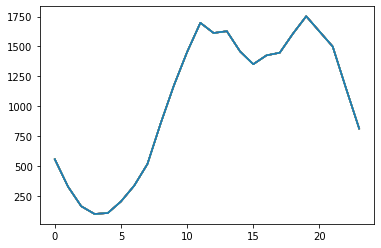

In [ ]:
hours = [hour for hour, df in df_NY.groupby(["Hour"])]
#hours = [ hour for hour, df in df3.groupby("Hour")]
plt.plot(hours, result)
plt.show()